In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis = 1)

In [5]:
X = pd.get_dummies(X, drop_first = True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_estimators' : [50, 100],
             'learning_rate' : [0.1, 0.05, 0.2],
             'max_depth' : [3, 4, 5]}

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [16]:
predictions = grid.predict(X_test)
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [17]:
grid.best_estimator_

GradientBoostingClassifier()

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [20]:
# grid.best_estimator_.feature_importances_

In [21]:
feat_import = grid.best_estimator_.feature_importances_

In [27]:
# feat_import

In [23]:
imp_feat = pd.DataFrame(index = X.columns,
                       data = feat_import,
                       columns = ['Importance'])

In [24]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [29]:
# imp_feat

In [25]:
imp_feat = imp_feat.sort_values('Importance')

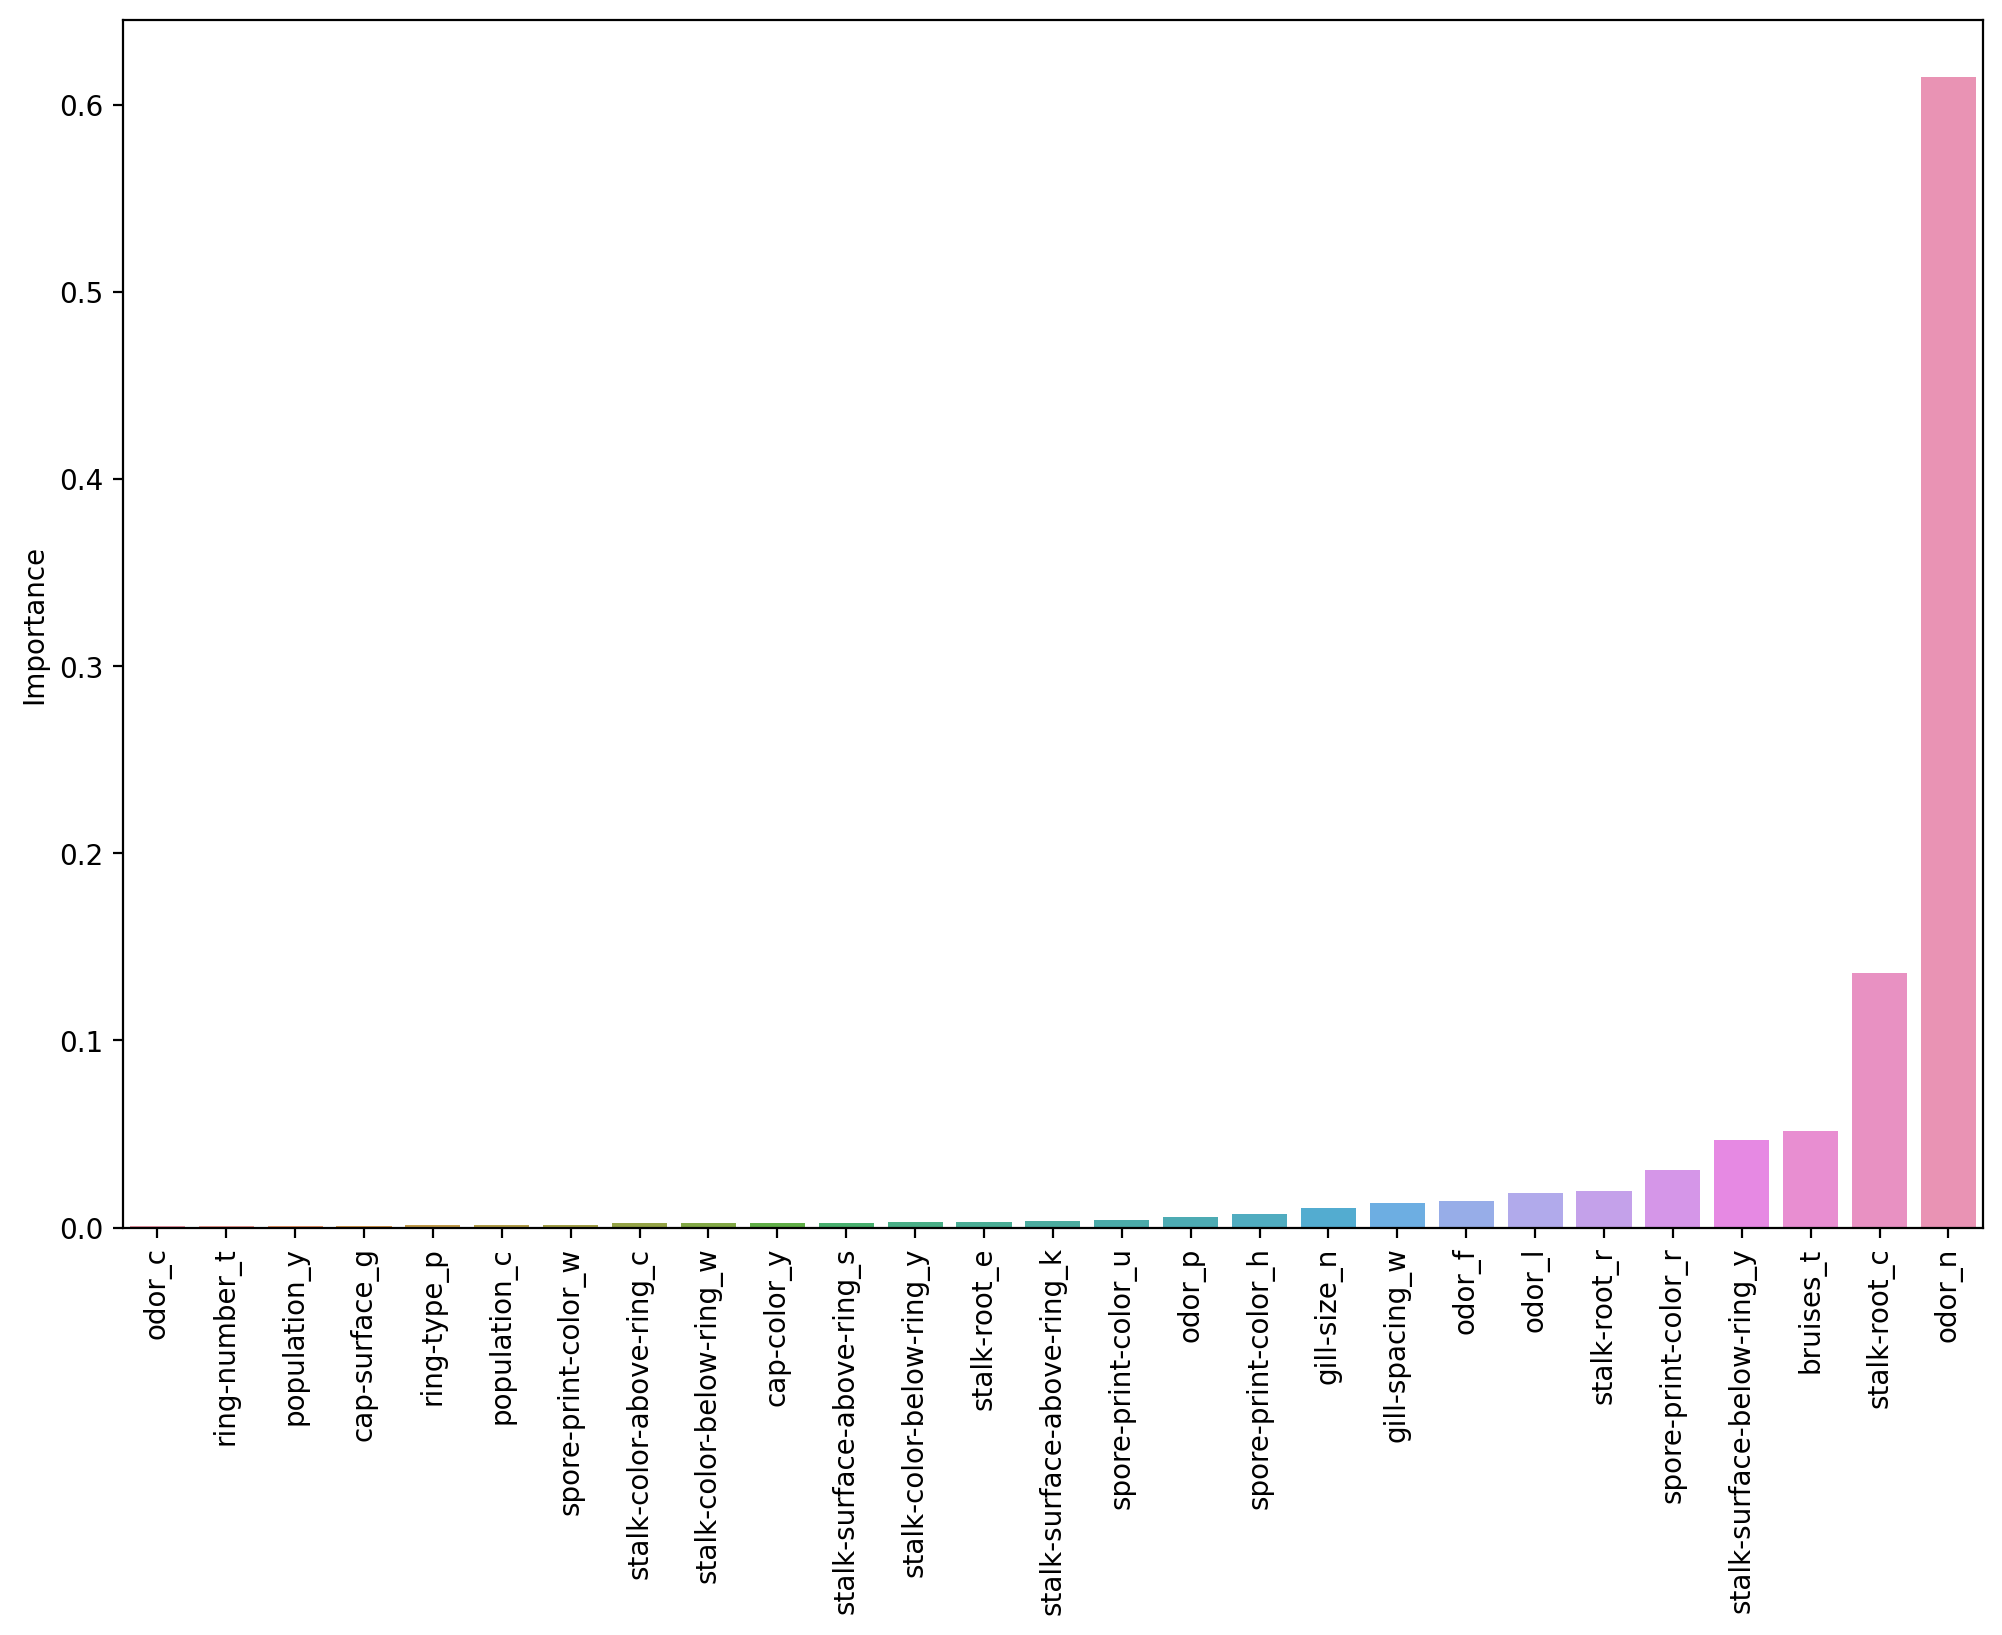

In [26]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.barplot(data = imp_feat,
           x = imp_feat.index,
           y = 'Importance')
plt.xticks(rotation = 90);